#First Start >> With Python Libriaries 

In [1]:
# from sklearn.neural_network import MLPRegressor
import numpy as np
# Initial imports
import pandas as pd
from pathlib import Path
import hvplot.pandas
import holoviews as hv
from itertools import islice
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
Historic_pricing = pd.read_csv(Path("./Historic_pricing.csv"),skiprows=1)
Historic_pricing= Historic_pricing.drop(columns=['Orig. List Price'])
Historic_pricing.head()
def convert_percentage_to_float(x):
    if isinstance(x, str):
        return float(x.strip('%')) / 100
    return x
for column in Historic_pricing:
    Historic_pricing[column] = pd.to_numeric(Historic_pricing[column].replace('[\$,]', '', regex=True), errors='coerce')


Historic_pricing['Listings*'] = pd.to_numeric( Historic_pricing['Listings*'].replace('[\$,]', '', regex=True), errors='coerce')
Historic_pricing['Price'] = pd.to_numeric( Historic_pricing['Price'].replace('[\$,]', '', regex=True), errors='coerce')
Historic_pricing['Price.1'] = pd.to_numeric( Historic_pricing['Price.1'].replace('[\$,]', '', regex=True), errors='coerce')
Historic_pricing['Sqft'] = pd.to_numeric( Historic_pricing['Sqft'].replace('[\$,]', '', regex=True), errors='coerce')
Historic_pricing['Listings.1'] = pd.to_numeric( Historic_pricing['Listings.1'].replace('[\$,]', '', regex=True), errors='coerce')
Historic_pricing['Listings.2'] = pd.to_numeric( Historic_pricing['Listings.2'].replace('[\$,]', '', regex=True), errors='coerce')

# Handle NaN values (example: fill with 0 or mean, or drop)
Historic_pricing.fillna(0, inplace=True)  # or df.dropna(inplace=True)

# Check the data types and convert if necessary
# Historic_pricing2['Year'] =  Historic_pricing2['Year'].astype(int)
# Historic_pricing2['Year Ago'] =  Historic_pricing2['Year Ago'].apply(convert_percentage_to_float)
Historic_pricing.head()

,Year,Month,Listings*,Price,Price.1,Sqft,Listings,Listings.1,Listings.2,DOM
0,2021,0.0,4815,321238,255000,132,7202,9088,6097,43
1,2021,0.0,4671,348928,270000,139,6148,7781,5721,42
2,2021,0.0,7327,363397,285000,143,8831,7184,7889,39
3,2021,0.0,7459,372590,290500,148,10164,7725,8195,33
4,2021,0.0,7856,389681,302500,152,10280,7938,8341,28


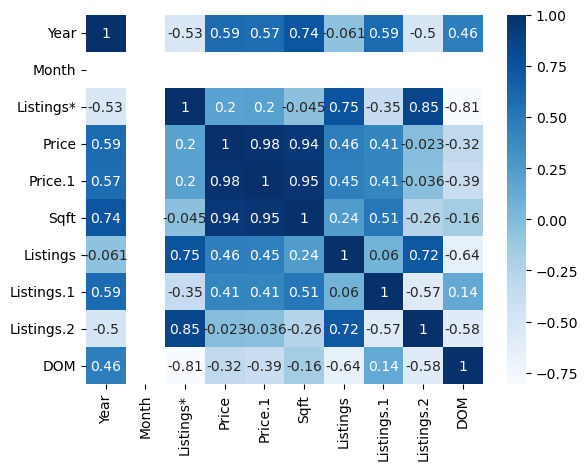

In [3]:
#Initate a correlation Matrix to understand the Dataframe
#There is a Correlation to the Datasets{Year, Month, Sqft, Price} with a 1 Saying there is a correlation
correlation_matrix = Historic_pricing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

Coefficients: 
 [19384.19444444]
Mean squared error: 436758134.53
Coefficient of determination: 0.36


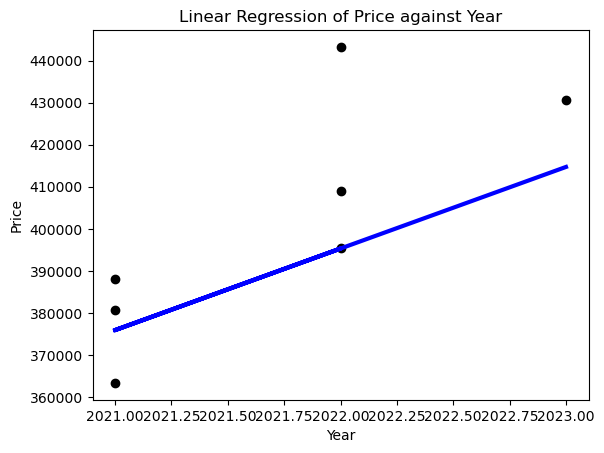

In [4]:
#Import the python Libs again, R2 scoring , Linear Regression, and TrainTestSplit, in respect, name them to not mangle the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use 'Year' as a column in the  DataFrame and 'Price' is as the target variable
# Then will reshape 'Year' to be a 2D array 
X = Historic_pricing['Year'].values.reshape(-1, 1)
y = Historic_pricing['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression object *Regr for shrt
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Print The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression of Price against Year')
plt.show()


Further Understand the Data by obtaing the data .Dtypes() and .Info()
To see Objects, Datetime, Floats, Intergers. etc..

In [5]:

Historic_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        32 non-null     int64  
 1   Month       32 non-null     float64
 2   Listings*   32 non-null     int64  
 3   Price       32 non-null     int64  
 4   Price.1     32 non-null     int64  
 5   Sqft        32 non-null     int64  
 6   Listings    32 non-null     int64  
 7   Listings.1  32 non-null     int64  
 8   Listings.2  32 non-null     int64  
 9   DOM         32 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 2.6 KB


In [6]:
Historic_pricing.dtypes

Year            int64
Month         float64
Listings*       int64
Price           int64
Price.1         int64
Sqft            int64
Listings        int64
Listings.1      int64
Listings.2      int64
DOM             int64
dtype: object

In [7]:
y = Historic_pricing['Year']
X = Historic_pricing.drop(columns='Year')


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)
X_train.shape

(24, 9)

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [9]:
classifier.fit(X_train, y_train)

# Score the accuracy
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.875


In [10]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,2022,2022
1,2023,2023
2,2021,2021
3,2021,2021
4,2022,2022


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[3, 0, 0],
       [0, 3, 0],
       [0, 1, 1]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        2021       1.00      1.00      1.00         3
        2022       0.75      1.00      0.86         3
        2023       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.84         8
weighted avg       0.91      0.88      0.86         8



In [13]:
scaler = StandardScaler()

In [14]:
X_scaler = scaler.fit(X_train)


In [15]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", " Predicted 2"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,3,0,0
Actual 1,0,3,0
Actual 2,0,0,2


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

        2021       1.00      1.00      1.00         3
        2022       1.00      1.00      1.00         3
        2023       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [21]:
importances = rf_model.feature_importances_


In [22]:
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.2283653060123878, 'Sqft'),
 (0.1406809019109165, 'Listings.1'),
 (0.1296309733121465, 'DOM'),
 (0.12879891830589546, 'Price'),
 (0.12732820205626263, 'Price.1'),
 (0.0887930195810822, 'Listings.2'),
 (0.0870360649937711, 'Listings*'),
 (0.06936661382753782, 'Listings'),
 (0.0, 'Month')]

In [26]:
# Fed_rate = pd.read_csv(Path("./daily-treasury-rates.csv"))
# Fed_rate
# def convert_percentage_to_float(x):
#     if isinstance(x, str):
#         return float(x.strip('%')) / 100
#     return x
# for column in Fed_rate:
#     Fed_rate[column] = pd.to_numeric(Fed_rate[column].replace('[\$,]', '', regex=True), errors='coerce')


# Fed_rate['Date'] = pd.to_numeric( Fed_rate['Date'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['1 Mo'] = pd.to_numeric( Fed_rate['1 Mo'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['2 Mo'] = pd.to_numeric( Fed_rate['2 Mo'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['3 Mo'] = pd.to_numeric( Fed_rate['3 Mo'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['4 Mo'] = pd.to_numeric( Fed_rate['4 Mo'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['6 Mo'] = pd.to_numeric( Fed_rate['6 Mo'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['1 Yr'] = pd.to_numeric( Fed_rate['1 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['2 Yr'] = pd.to_numeric( Fed_rate['2 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['3 Yr'] = pd.to_numeric( Fed_rate['3 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['5 Yr'] = pd.to_numeric( Fed_rate['5 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['7 Yr'] = pd.to_numeric( Fed_rate['7 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['10 Yr'] = pd.to_numeric( Fed_rate['10 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['20 Yr'] = pd.to_numeric( Fed_rate['20 Yr'].replace('[\$,]', '', regex=True), errors='coerce')
# Fed_rate['30 Yr'] = pd.to_numeric( Fed_rate['30 Yr'].replace('[\$,]', '', regex=True), errors='coerce')

# Fed_rate.head()


In [27]:
# Fed_rate.hvplot()